# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

Signature: gpd.read_file(filename, bbox=None, mask=None, rows=None, **kwargs)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. versionadded:: 0.7.0 mask, rows

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a
    shapely geometry. CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect with the given dict-like geojson
    geometry, GeoSeries, GeoDataFrame or shapely geometry.
    CRS mis-matches are resolved if given a GeoSeries or GeoDataFrame.
    Cannot be used with bbox.
rows : int or slice, default None
    L

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
ph = gpd.read_file('datasets/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

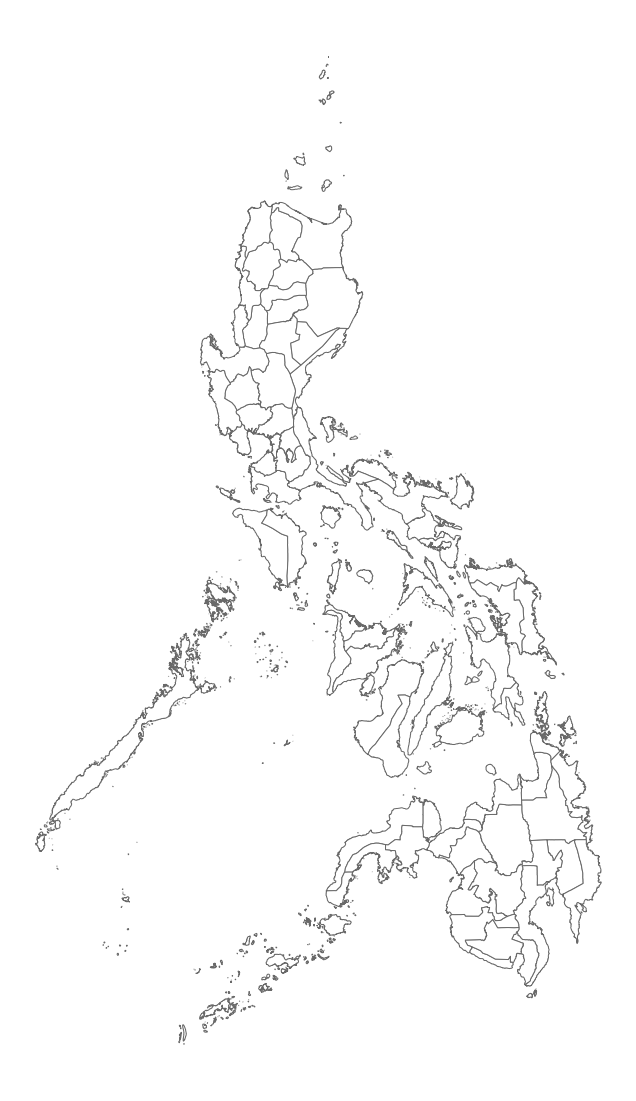

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file('datasets/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [7]:
# Read in the data using pandas

citibike = pd.read_csv('datasets/202102-citibike-tripdata.csv')
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,304,2021-02-01 00:04:23.0780,2021-02-01 00:09:27.7920,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2
1,370,2021-02-01 00:07:08.8080,2021-02-01 00:13:19.4670,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1
2,635,2021-02-01 00:07:55.9390,2021-02-01 00:18:31.0390,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2
3,758,2021-02-01 00:08:42.0960,2021-02-01 00:21:20.7820,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0
4,522,2021-02-01 00:09:32.6820,2021-02-01 00:18:15.4100,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1


In [8]:
citibike.shape

(634631, 15)

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [9]:
stations = citibike[['end station longitude', 'end station latitude']]

In [10]:
stations.drop_duplicates(inplace=True)
stations.shape

<ipython-input-10-2a765e21ed06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations.drop_duplicates(inplace=True)


(1283, 2)

In [11]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]

# Set the crs
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,end station longitude,end station latitude,geometry
0,-73.990050,40.772370,POINT (-73.99005 40.77237)
1,-73.958408,40.768762,POINT (-73.95841 40.76876)
2,-73.976687,40.722281,POINT (-73.97669 40.72228)
3,-73.955959,40.781411,POINT (-73.95596 40.78141)
4,-73.974498,40.743227,POINT (-73.97450 40.74323)


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

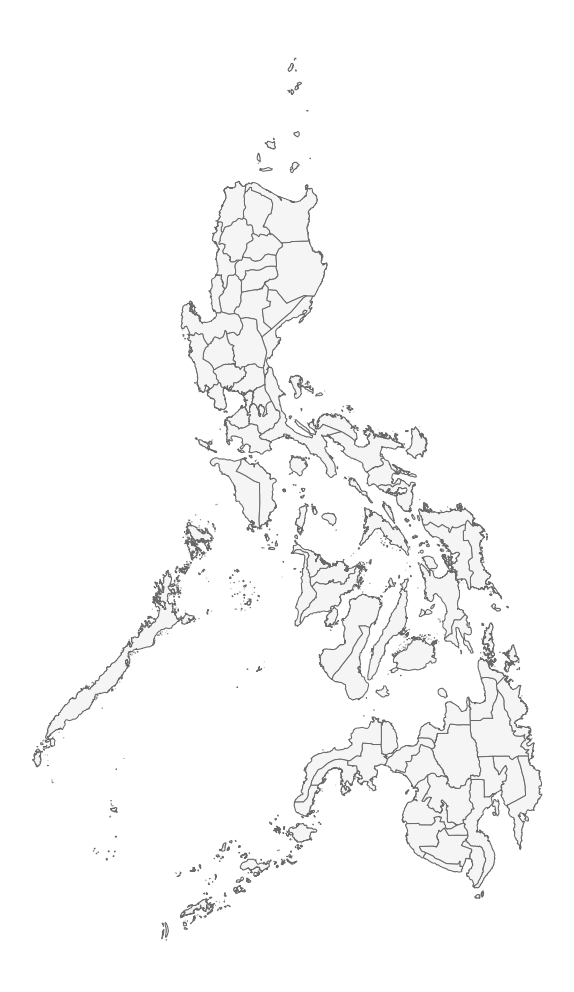

In [12]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [13]:
taxi = gpd.read_file('datasets/taxi_zones/taxi_zones.shp')
taxi.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

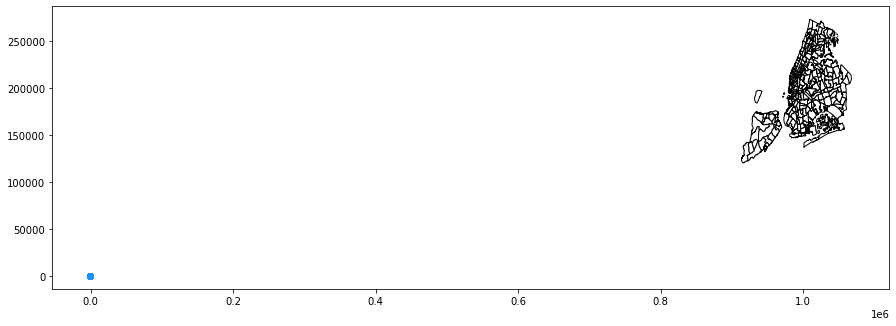

In [14]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);

In [15]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

Taxizones CRS epsg:2263
Citi Bike CRS +init=epsg:4326 +type=crs


In [16]:
# First option is to pass a dictionary like how we initialized the citibike dataframe - this is the CRS
citi_gdf = citi_gdf.to_crs({'init': 'epsg:2263'})

# Another is to simply pass the code for the epsg through the epsg parameter
#citi_gdf = citi_gdf.to_crs(epsg=2263)

C:\ProgramData\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


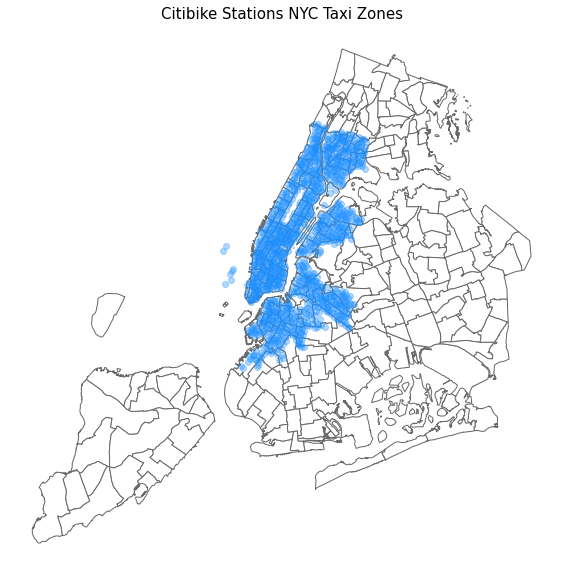

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations NYC Taxi Zones', fontsize=15)
ax.axis('off');

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [18]:
# Read in the shapefile from the download
world = gpd.read_file('datasets/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [19]:
population = pd.read_csv('datasets/API_SP.POP.TOTL_DS2_en_csv_v2_2252106/API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv',
                         skiprows=3)
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0


In [20]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [21]:
# Merge the two dataframes
# Here I used LEFT JOIN first to be able to get all the country shapes
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,"Population, total",SP.POP.TOTL,87751068.0,90098394.0,92518377.0,...,241834215.0,245116206.0,248452413.0,251806402.0,255129004.0,258383256.0,261554226.0,264645886.0,267663435.0,270625568.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,"Population, total",SP.POP.TOTL,8156347.0,8417824.0,8692342.0,...,28208035.0,28650955.0,29068159.0,29468872.0,29866559.0,30270962.0,30684804.0,31105028.0,31528585.0,31949777.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,"Population, total",SP.POP.TOTL,8132990.0,8303811.0,8476897.0,...,17062536.0,17233576.0,17400347.0,17571507.0,17758959.0,17969353.0,18209068.0,18470439.0,18729160.0,18952038.0
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,BOL,"Population, total",SP.POP.TOTL,3656955.0,3728964.0,3802990.0,...,10048590.0,10212954.0,10377676.0,10542376.0,10706517.0,10869730.0,11031813.0,11192854.0,11353142.0,11513100.0
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,"Population, total",SP.POP.TOTL,10155015.0,10446620.0,10749466.0,...,29027674.0,29264318.0,29506788.0,29773987.0,30090359.0,30470734.0,30926032.0,31444297.0,31989256.0,32510453.0


In [22]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
250,Macao S.A.R,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...","Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,167791.0,170462.0,176183.0,...,538219.0,550832.0,564039.0,577372.0,590208.0,602085.0,612836.0,622585.0,631636.0,640445.0
251,Ashmore and Cartier Islands,ATC,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Serranilla Bank,SER,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(-197.99999999999991, 198.0, -62.8961344667999, 90.61173089680007)

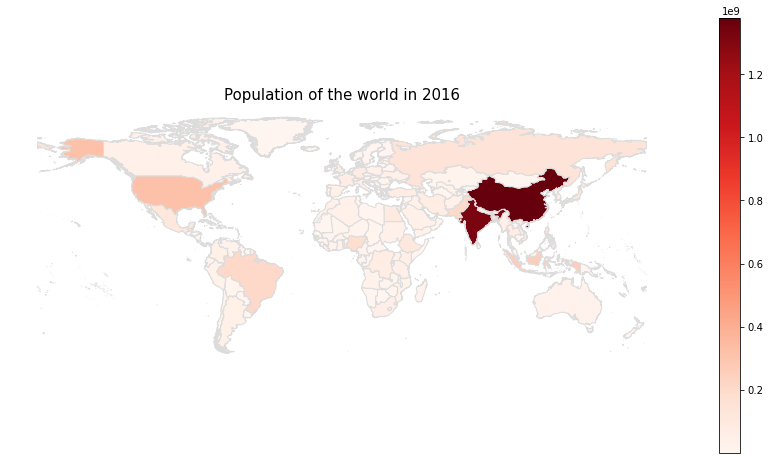

In [23]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15);
ax.axis(False)

In [24]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

(209, 67)

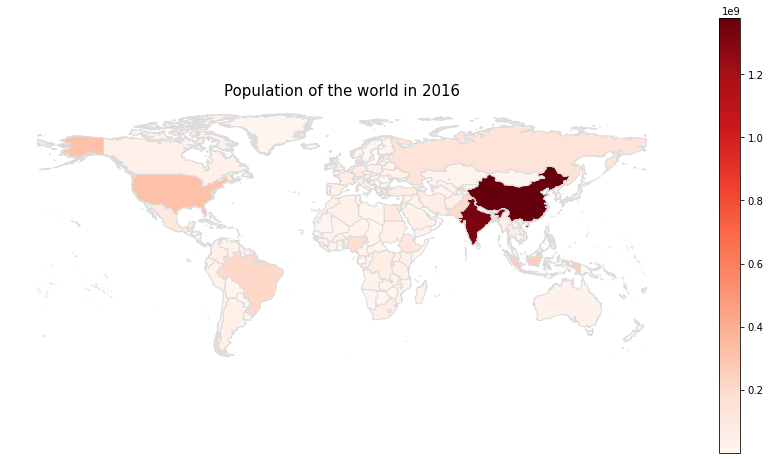

In [25]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15)
ax.axis('off');

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [26]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.


Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, defau

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [27]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
stations_within.head()

,end station longitude,end station latitude,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,-73.990050,40.772370,POINT (987005.878 220672.357),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
60,-73.989187,40.775160,POINT (987244.799 221688.704),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
103,-73.982886,40.777480,POINT (988989.819 222534.574),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
658,-73.984706,40.774667,POINT (988486.007 221509.481),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
773,-73.990460,40.771497,POINT (986892.258 220354.176),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan


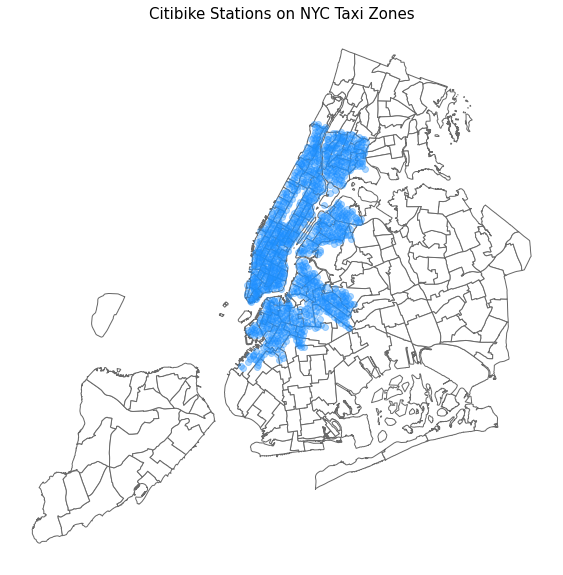

In [28]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
stations_within.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [29]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, op='contains')
zones_with_stations.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,end station longitude,end station latitude
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",33,-73.977932,40.720828
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",929,-73.980858,40.720874
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",414,-73.979955,40.722992
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",170,-73.975767,40.723870


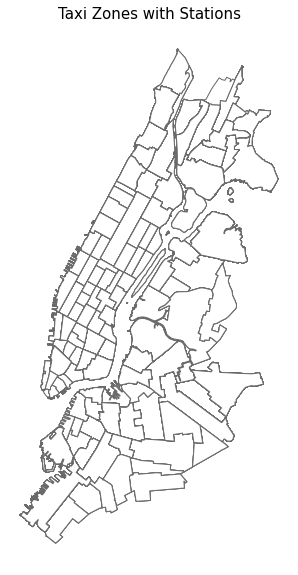

In [30]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [31]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


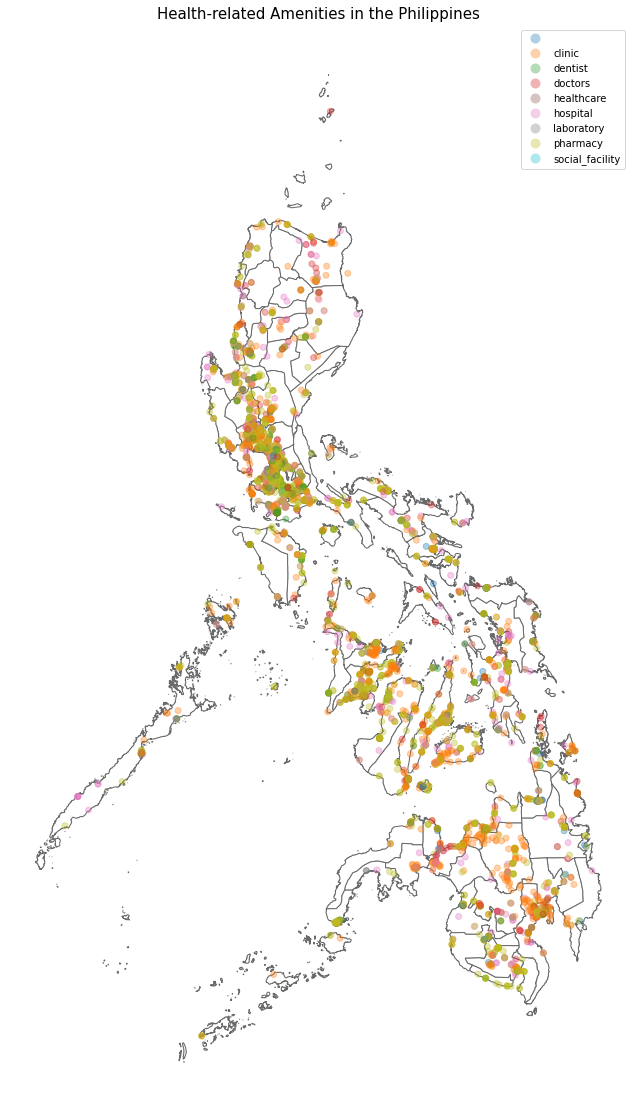

In [32]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [33]:
healthsites.describe(include=np.object)

<ipython-input-33-6f105f861a18>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  healthsites.describe(include=np.object)


,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [34]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

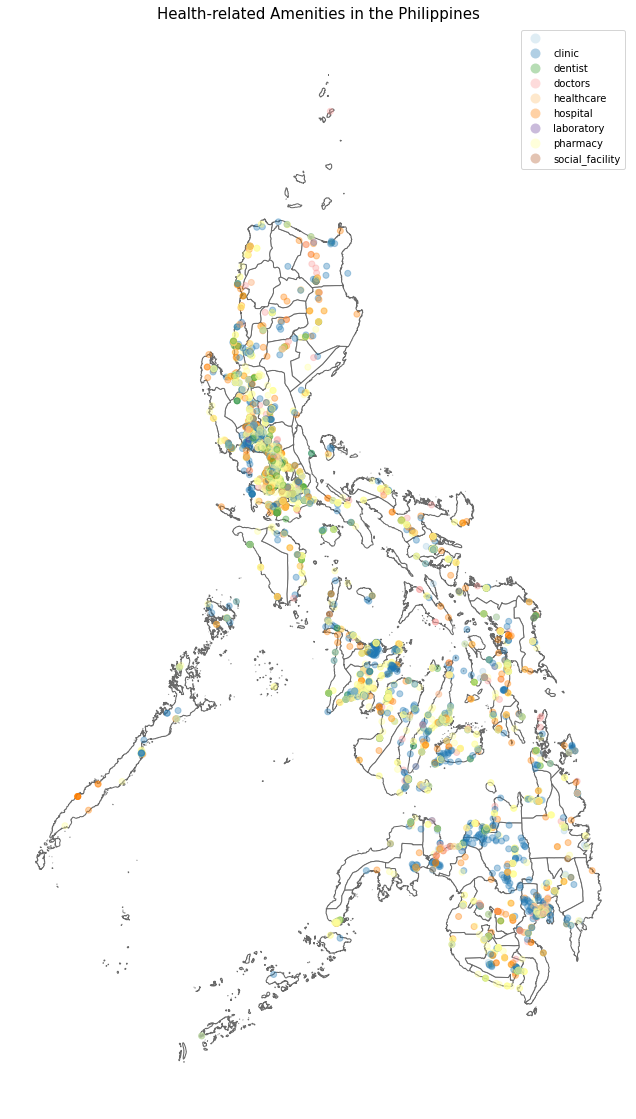

In [35]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

<AxesSubplot:>

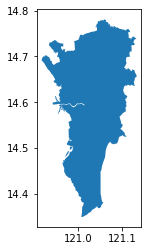

In [36]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

Note: Some of the provinces do not have all of the amenities available in their locations. These will not have visualizations in the succeeding cells.

In [37]:
#Amenities
clinic = healthsites[healthsites.amenity=='clinic']
dentist = healthsites[healthsites.amenity=='dentist']
doctor = healthsites[healthsites.amenity=='doctors']
healthcare = healthsites[healthsites.amenity=='healthcare']
hospital = healthsites[healthsites.amenity=='hospital']
laboratory = healthsites[healthsites.amenity=='laboratory']
pharmacy = healthsites[healthsites.amenity=='pharmacy']
social_facility = healthsites[healthsites.amenity=='social_facility']

#### Metro Manila Health-Related Amenities

In [38]:
metromanila = ph[ph.NAME_1=="Metropolitan Manila"]
metromanila

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM,"MULTIPOLYGON (((120.97972 14.49306, 120.98000 ..."


##### Clinics

In [39]:
metromanila_clinics = gpd.sjoin(clinic, metromanila, op='within')
metromanila_clinics.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
37,5920487685,node,18.0,,clinic,,Quirino Highway,,,83885861.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
61,121507897,way,21.0,,clinic,,Don Chino Roces Avenue,,,76242066.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
104,7328659788,node,21.0,,clinic,,Carlos P Garcia Avenue,,,82632960.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
109,7154387721,node,9.0,,clinic,,,,,79987239.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
132,4927834221,node,15.0,,clinic,,Bonifacio,,,80625591.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


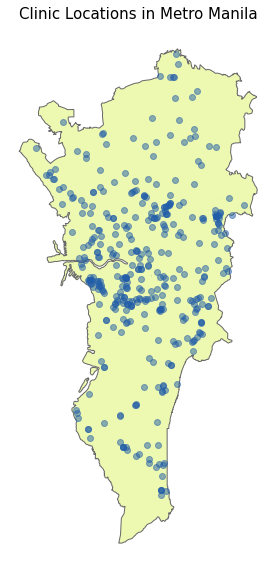

In [40]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-clinic.png')

##### Dentists

In [41]:
metromanila_dentists = gpd.sjoin(dentist, metromanila, op='within')
metromanila_dentists.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
15,796284976,way,9.0,,dentist,,,,,84795442.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
208,6364087400,node,12.0,,dentist,,,,,68574404.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
228,4439824891,node,9.0,,dentist,,Cabildo,,,83868195.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
249,6975522485,node,15.0,,dentist,,Ascencion Avenue,,,77046736.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
279,3076961797,node,12.0,,dentist,,,,,25435196.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


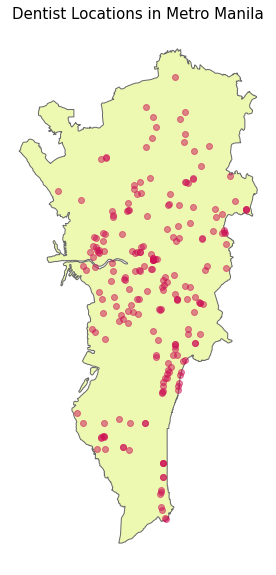

In [42]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_dentists.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-dentist.png')

##### Doctors

In [43]:
metromanila_doctors = gpd.sjoin(doctor, metromanila, op='within')
metromanila_doctors.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
69,7785286855,node,15.0,,doctors,,,Dr. Joel Nicdao,,88948893.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
624,974331400,node,15.0,,doctors,,Bayan-Bayanan Avenue,,,23514481.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
665,4119521890,node,18.0,,doctors,,8th Avenue,,,80793175.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
1449,4574916393,node,9.0,,doctors,,,,,86332297.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


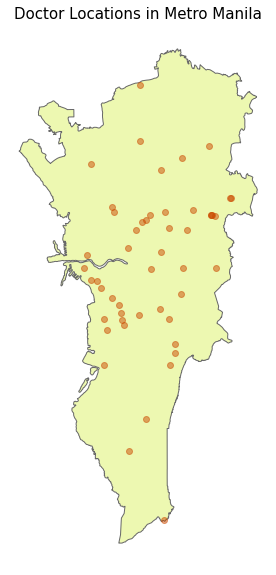

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_doctors.plot(ax=ax, alpha=0.5, color='#cc4c02')
ax.set_title('Doctor Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-doctor.png')

##### Healthcare

In [45]:
metromanila_healthcare = gpd.sjoin(healthcare, metromanila, op='within')
metromanila_healthcare.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
8813,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


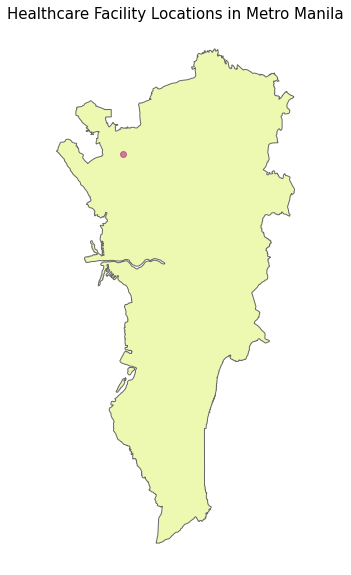

In [46]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_healthcare.plot(ax=ax, alpha=0.5, color='#ae017e')
ax.set_title('Healthcare Facility Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-healthcare.png')

##### Hospitals

In [47]:
metromanila_hospital = gpd.sjoin(hospital, metromanila, op='within')
metromanila_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
63,7278748585,node,25.0,,hospital,,Quirino Highway,,,85720762.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
76,255070464,node,25.0,,hospital,,,,,89338589.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
128,1446052374,node,15.0,,hospital,,Pio Valenzuela,,,82663468.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
158,121189960,way,25.0,,hospital,,General Ordonez,,,82632960.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
201,303409437,way,15.0,,hospital,,New Panaderos,,,25445424.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


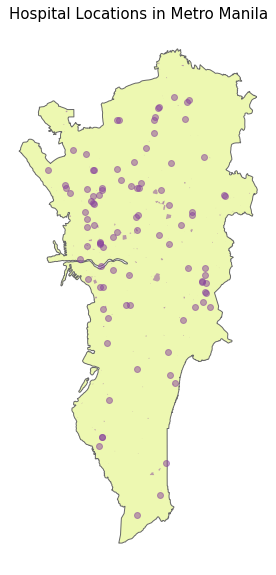

In [48]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_hospital.plot(ax=ax, alpha=0.5, color='#88419d')
ax.set_title('Hospital Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-hospital.png')

##### Pharmacies

In [49]:
metromanila_pharmacy = gpd.sjoin(pharmacy, metromanila, op='within')
metromanila_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
26,4217096997,node,18.0,,pharmacy,,Shaw Boulevard,,,97336875.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
27,6556682427,node,12.0,,pharmacy,,J.P. Rizal,,,71387128.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


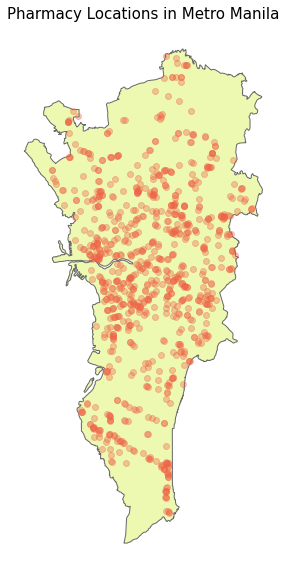

In [50]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_pharmacy.plot(ax=ax, alpha=0.35, color='#ef6548')
ax.set_title('Pharmacy Locations in Metro Manila', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Metro Manila/metromanila-pharmacy.png')

#### Capiz Health-Related Amenities

In [51]:
capiz = ph[ph.NAME_1=="Capiz"]
capiz

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
21,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP,"MULTIPOLYGON (((122.90222 11.45917, 122.90222 ..."


##### Clinics

In [52]:
capiz_clinic = gpd.sjoin(clinic, capiz, op='within')
capiz_clinic.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
34,6374111785,node,18.0,,clinic,,Arnaldo Boulevard,,,68727612.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
325,7141827433,node,15.0,,clinic,gynaecology,,,,79743489.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
399,5681349314,node,9.0,,clinic,,,,,59732250.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
566,5688593027,node,9.0,,clinic,,,,,59819503.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
1117,5788828559,node,6.0,,clinic,,,,,61107434.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP


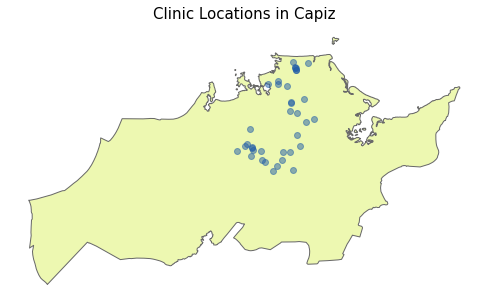

In [53]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_clinic.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Capiz', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Capiz/capiz-clinic.png')

##### Dentists

In [54]:
capiz_dentist = gpd.sjoin(dentist, capiz, op='within')
capiz_dentist.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
1081,7140534096,node,9.0,,dentist,,,,,79721175.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
1500,7564624236,node,12.0,,dentist,,,,,85861367.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
2411,7161739372,node,12.0,,dentist,,,,,80120264.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
2835,7323494845,node,12.0,,dentist,,,,,82538714.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
3849,1910811046,node,9.0,,dentist,,,,,13076680.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP


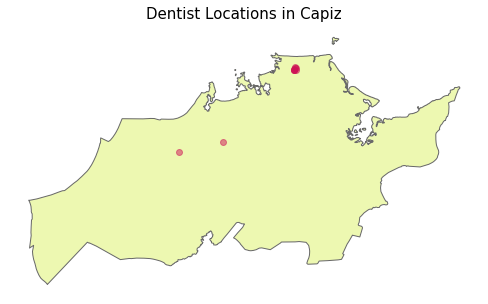

In [55]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_dentist.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Capiz', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Capiz/capiz-dentist.png')

##### Hospitals

In [56]:
capiz_hospital = gpd.sjoin(hospital, capiz, op='within')
capiz_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
88,6081749385,node,21.0,,hospital,,,Department of Health,,78078656.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
207,470454063,way,21.0,,hospital,,Nueva Street,LGU - Jamindan,,45671967.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
297,6190130503,node,12.0,,hospital,,,,,79739508.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
907,764470884,way,9.0,,hospital,,,,,79743489.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
1304,251644526,way,9.0,,hospital,,,,,19434399.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP


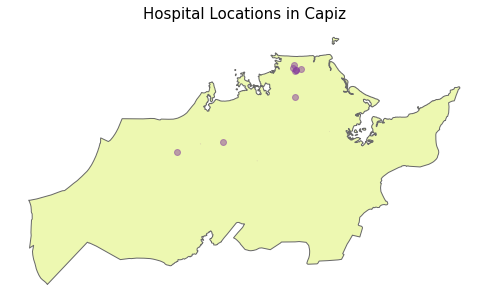

In [57]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Capiz', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Capiz/capiz-hospital.png')

##### Pharmacies

In [58]:
capiz_pharmacy = gpd.sjoin(pharmacy, capiz, op='within')
capiz_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
899,1977838684,node,12.0,,pharmacy,,,,,79721175.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
4233,7576100836,node,15.0,,pharmacy,,,,,86021890.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
4901,5246618924,node,21.0,,pharmacy,,Burgos Street,,,54064429.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
5750,7140540162,node,12.0,,pharmacy,,Roxas Avenue,,,86750246.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP
6842,7140540167,node,15.0,,pharmacy,,,,,79721396.0,...,PHL,Philippines,PHL.22_1,Capiz,None,None,Lalawigan|Probinsya,Province,619,PH.CP


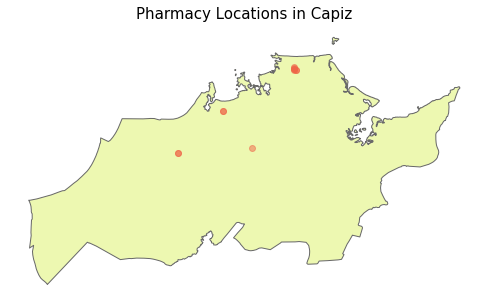

In [59]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Capiz', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Capiz/capiz-pharmacy.png')

#### Laguna Health-Related Amenities

In [60]:
laguna = ph[ph.NAME_1=="Laguna"]
laguna

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
39,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG,"POLYGON ((121.17153 14.13810, 121.16483 14.140..."


##### Clinics

In [61]:
laguna_clinics = gpd.sjoin(clinic, laguna, op='within')
laguna_clinics.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
93,707487260,way,18.0,,clinic,,Manila East Road,,,89875377.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
354,7328548088,node,15.0,,clinic,,,,,82632960.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
363,524445640,way,9.0,,clinic,,,,,52645503.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
400,5037084293,node,25.0,,clinic,,National Highway,,,66255719.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
417,116775129,way,12.0,,clinic,,,,,55569745.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


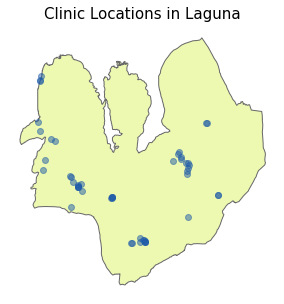

In [62]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Laguna', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Laguna/laguna-clinic.png')

##### Dentists

In [63]:
laguna_dentist = gpd.sjoin(dentist, laguna, op='within')
laguna_dentist.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
114,3050027470,node,9.0,,dentist,,,,,46805548.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
280,7417132828,node,21.0,,dentist,,J. P. Rizal Street,,,83744058.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
705,175567351,way,25.0,,dentist,,Justice Avanceña,,,12772071.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
722,5106504399,node,6.0,,dentist,,,,,52998732.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
1292,6337145204,node,12.0,,dentist,,Manuel L. Quezon Avenue,,,80894503.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


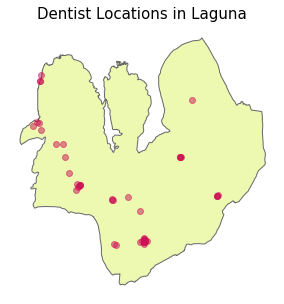

In [64]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_dentist.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Laguna', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Laguna/laguna-dentist.png')

##### Doctors

In [65]:
laguna_doctor = gpd.sjoin(doctor, laguna, op='within')
laguna_doctor.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
245,3357886925,node,25.0,,doctors,,Apolinario Mabini,,,79874907.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
544,3050033712,node,15.0,,doctors,,J. de Leon,,,28562129.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
737,2626931464,node,21.0,,doctors,,José Rizal Avenue,,,79874907.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
807,111780711,way,25.0,,doctors,,Opal,,,82610845.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
917,3120473394,node,25.0,,doctors,,Zulueta,,,79874907.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


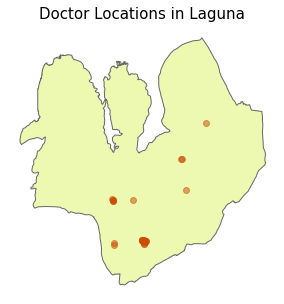

In [66]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Laguna', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Laguna/laguna-doctor.png')

##### Hospitals

In [67]:
laguna_hospital = gpd.sjoin(hospital, laguna, op='within')
laguna_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
71,531872352,way,12.0,,hospital,,,,,52847963.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
288,68169218,way,21.0,,hospital,,Lopez Avenue,,,82611504.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
323,119884297,way,18.0,,hospital,,Manila East Road,,,15566737.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
918,4107717630,node,9.0,,hospital,,,,,78423307.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
933,549080335,way,6.0,,hospital,,,,,54920993.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


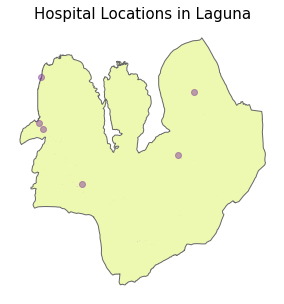

In [68]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Laguna', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Laguna/laguna-hospital.png')

##### Pharmacies

In [69]:
laguna_pharmacy = gpd.sjoin(pharmacy, laguna, op='within')
laguna_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
9,1018210574,node,21.0,,pharmacy,,Marcelo H. del Pilar Avenue,,,96334310.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
19,7328321185,node,15.0,,pharmacy,,Manila East Road,,,89875377.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
92,4375248398,node,12.0,,pharmacy,,,,,78426672.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
96,1363220707,node,21.0,,pharmacy,,A. Flores,,,95723188.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG
143,1427972764,node,21.0,,pharmacy,,Los Baños - Bay Road,,,87575807.0,...,PHL,Philippines,PHL.40_1,Laguna,None,None,Lalawigan|Probinsya,Province,434,PH.LG


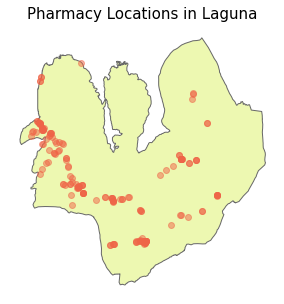

In [70]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Laguna', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Laguna/laguna-pharmacy.png')

#### Bataan Health-Related Amenities

In [71]:
bataan = ph[ph.NAME_1=="Bataan"]
bataan

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


#### Clinics

In [72]:
bataan_clinics = gpd.sjoin(clinic, bataan, op='within')
bataan_clinics.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
1753,3315765892,node,9.0,,clinic,,,,,28456833.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
1971,4143776189,node,9.0,,clinic,,,,,38824122.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
2351,274219537,way,9.0,,clinic,,,,,21680917.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
2525,351394776,way,6.0,,clinic,,,,,31712927.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
3062,8086601651,node,25.0,,clinic,,Jose Abad Santos Avenue,Adelita Desear,,93631729.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA


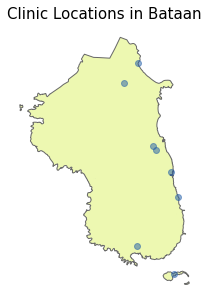

In [73]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Bataan', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Bataan/bataan-clinic.png')

#### Doctors

In [74]:
bataan_doctor = gpd.sjoin(doctor, bataan, op='within')
bataan_doctor.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
299,441086790,way,15.0,,doctors,,,,,66162515.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
447,274214756,way,15.0,,doctors,,Capitol Drive,,,75083834.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
7541,5999499585,node,9.0,,doctors,,,,,63695130.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
7862,4313367292,node,12.0,,doctors,,,,,56969124.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
8625,451299058,way,12.0,,doctors,,,,,56969124.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA


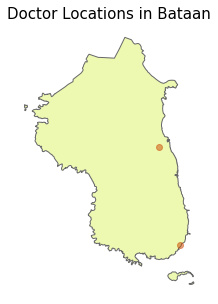

In [75]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Bataan', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Bataan/bataan-doctor.png')

#### Hospitals

In [76]:
bataan_hospital = gpd.sjoin(hospital, bataan, op='within')
bataan_hospital.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
726,274214957,way,9.0,,hospital,,,,,21681193.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
883,1367547424,node,9.0,,hospital,,,,,8775294.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
1543,4313393091,node,9.0,,hospital,,,,,40903395.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
1765,184764270,way,21.0,,hospital,,Lakandula Street,,,51779590.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
3269,-10095989,way,9.0,,hospital,,Calero,,,NaN,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA


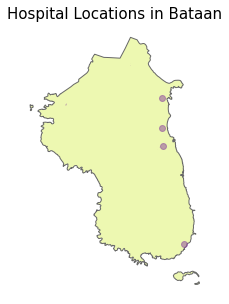

In [77]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Bataan', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Bataan/bataan-hospital.png')

#### Pharmacies

In [78]:
bataan_pharmacy = gpd.sjoin(pharmacy, bataan, op='within')
bataan_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
14,4451774792,node,9.0,,pharmacy,,,,,64321897.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
1930,1478865411,node,15.0,,pharmacy,,P. Paterno Street,,,85468750.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
2426,329609970,way,9.0,,pharmacy,,,,,29013905.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
3082,351369769,way,9.0,,pharmacy,,,,,31711268.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA
3098,5358745623,node,9.0,,pharmacy,,,,,55709819.0,...,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA


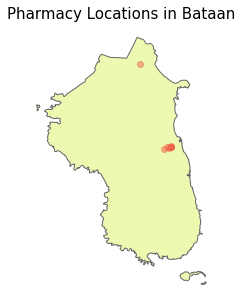

In [79]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Bataan', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Bataan/bataan-pharmacy.png')

#### Abra Health-Related Amenities

In [80]:
abra = ph[ph.NAME_1=="Abra"]
abra

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."


##### Doctors

In [81]:
abra_doctor = gpd.sjoin(doctor, abra, op='within')
abra_doctor.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
6389,4550995889,node,12.0,,doctors,,,,,56969124.0,...,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB
7787,7024594985,node,9.0,,doctors,,,,,77793373.0,...,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB


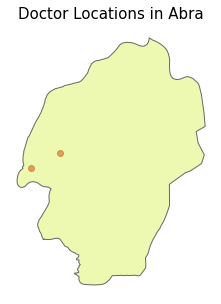

In [82]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
abra.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
abra_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Abra', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Abra/abra-doctor.png')

##### Pharmacies

In [83]:
abra_pharmacy= gpd.sjoin(pharmacy, abra, op='within')
abra_pharmacy.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
2194,3093489523,node,9.0,,pharmacy,,,,,25637599.0,...,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB


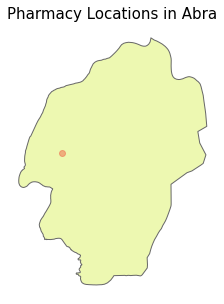

In [84]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
abra.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
abra_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Abra', fontsize=15)
ax.axis('off');
plt.savefig('Visualizations/Abra/abra-pharmacy.png')

### Combining to a single plot

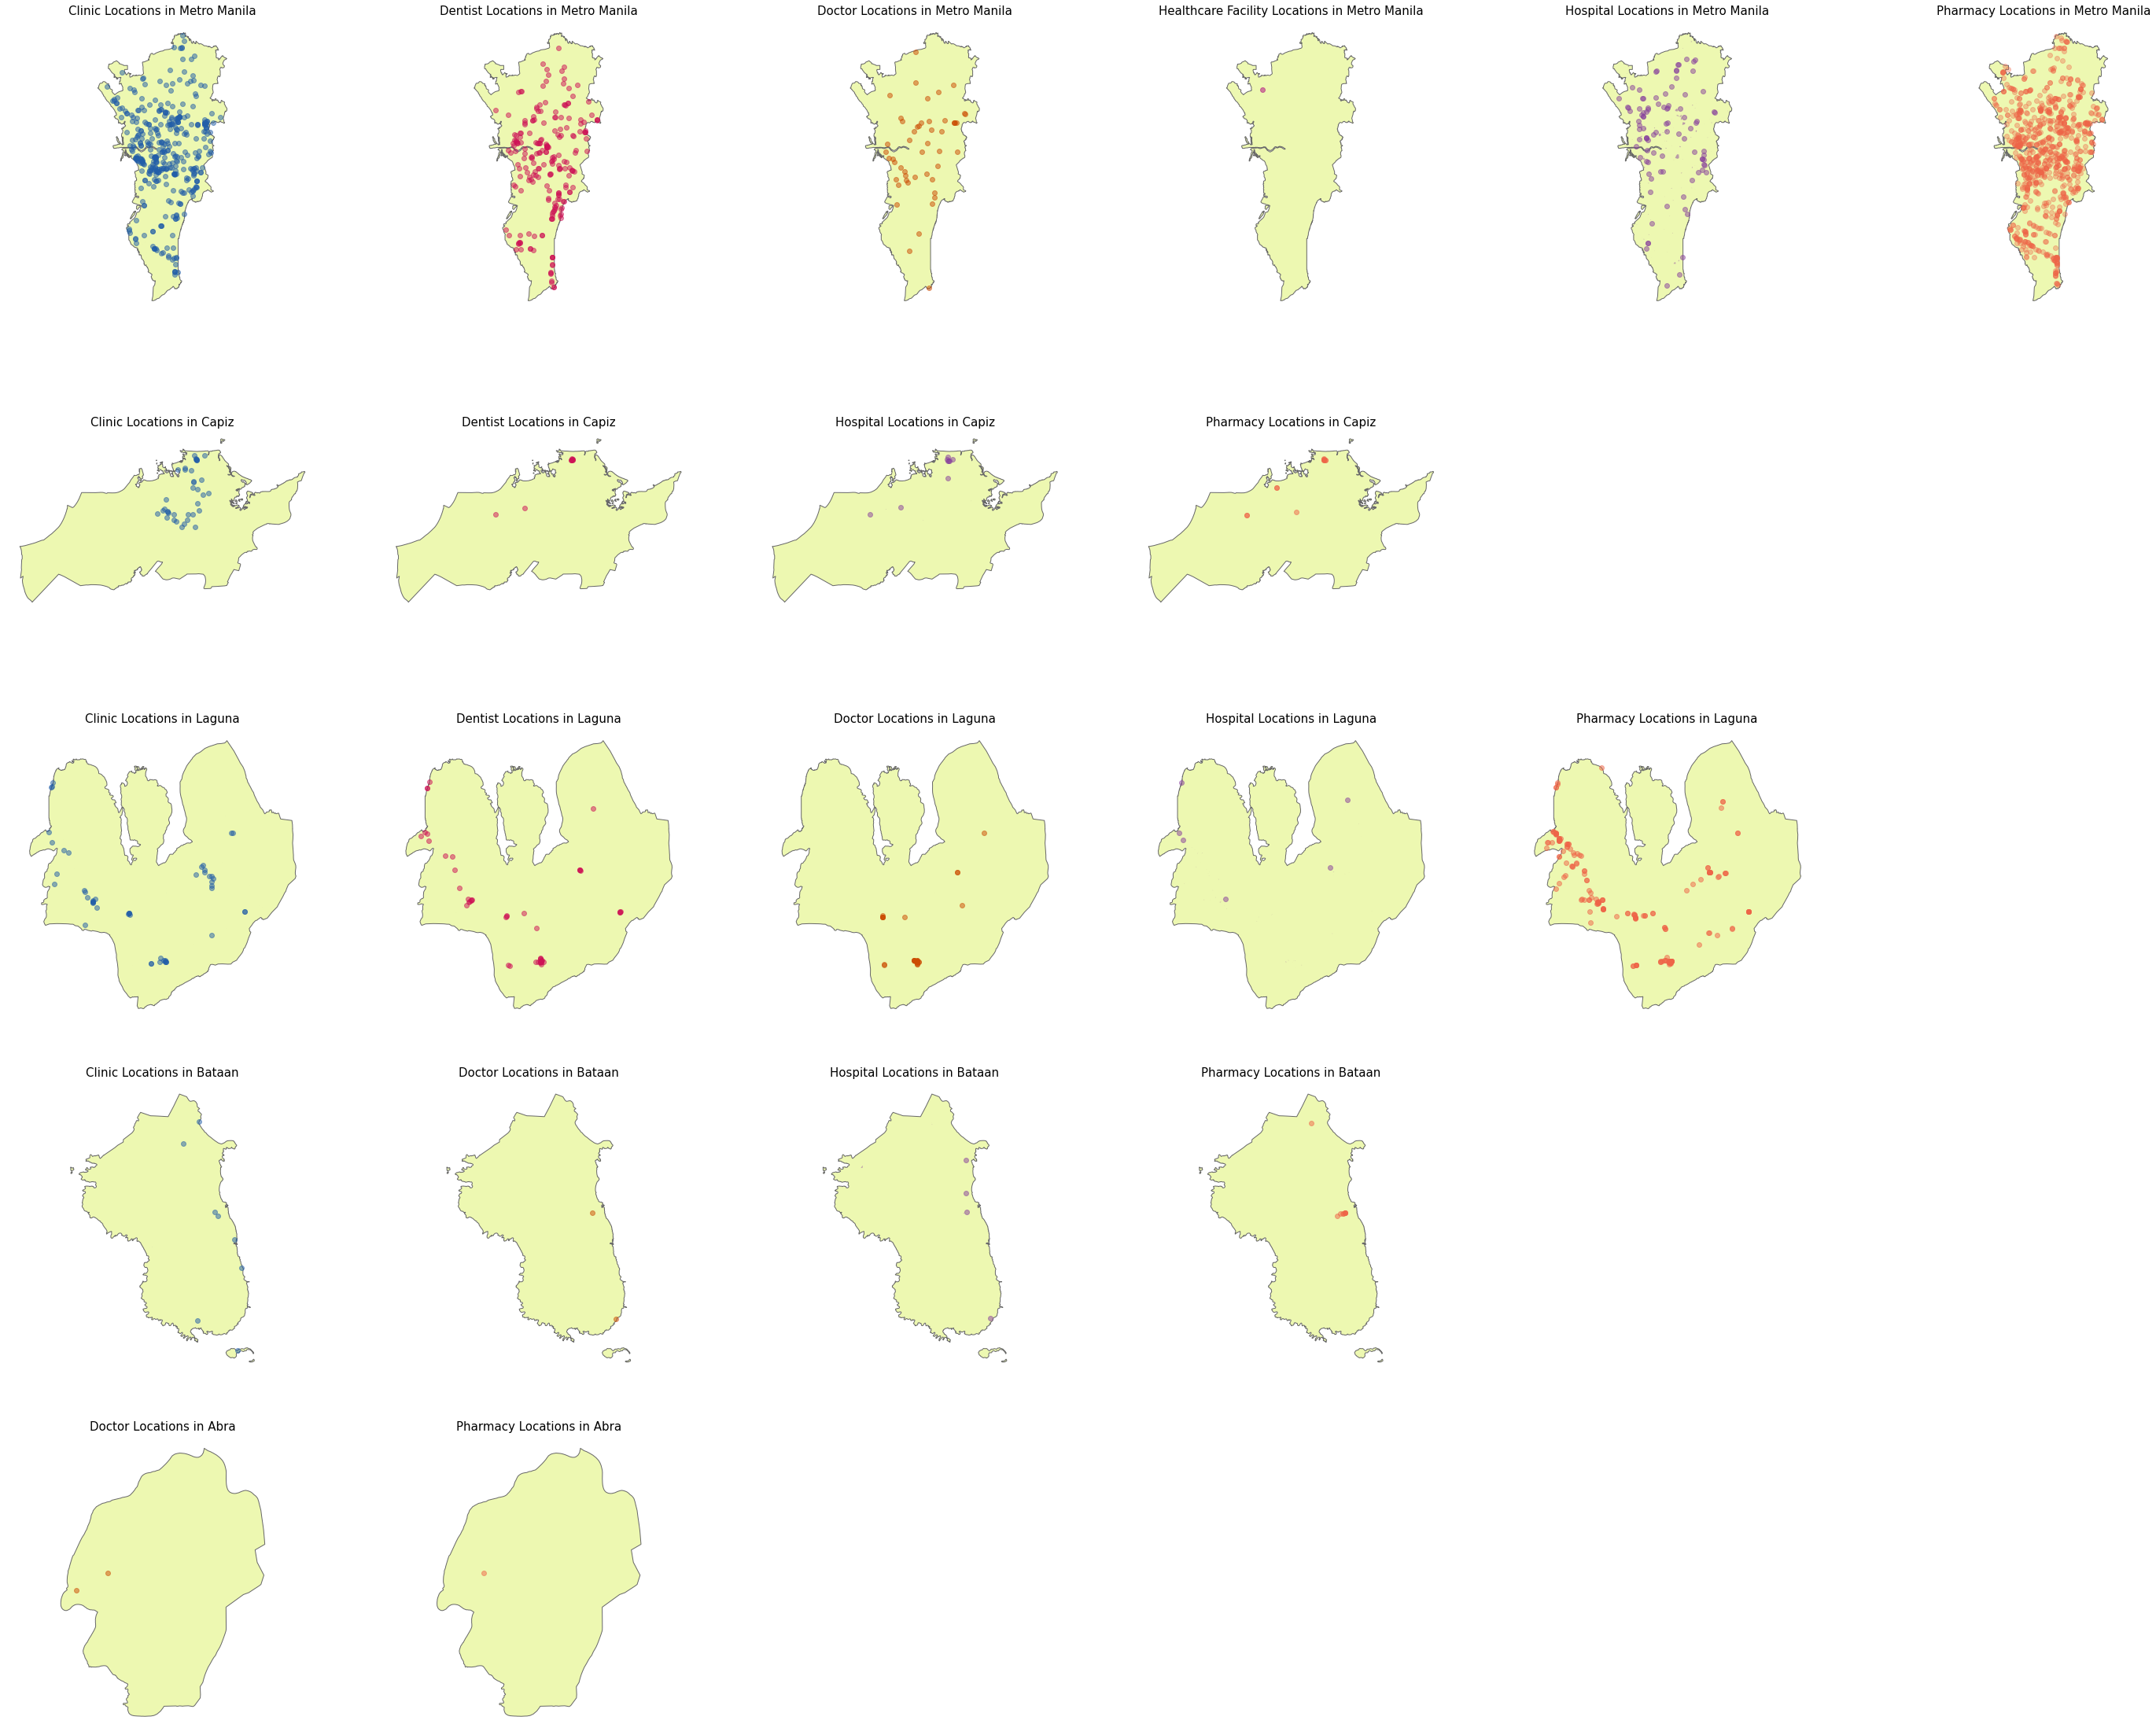

In [85]:
# METRO MANILA
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(5,6,1)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Metro Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,2)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_dentists.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Metro Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,3)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_doctors.plot(ax=ax, alpha=0.5, color='#cc4c02')
ax.set_title('Doctor Locations in Metro Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,4)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_healthcare.plot(ax=ax, alpha=0.5, color='#ae017e')
ax.set_title('Healthcare Facility Locations in Metro Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,5)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_hospital.plot(ax=ax, alpha=0.5, color='#88419d')
ax.set_title('Hospital Locations in Metro Manila', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,6)
metromanila.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
metromanila_pharmacy.plot(ax=ax, alpha=0.35, color='#ef6548')
ax.set_title('Pharmacy Locations in Metro Manila', fontsize=15)
ax.axis('off');

# CAPIZ
ax = fig.add_subplot(5,6,7)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_clinic.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Capiz', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,8)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_dentist.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Capiz', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,9)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Capiz', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,10)
capiz.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
capiz_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Capiz', fontsize=15)
ax.axis('off');

#LAGUNA
ax = fig.add_subplot(5,6,13)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Laguna', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,14)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_dentist.plot(ax=ax, alpha=0.5, color="#ce1256")
ax.set_title('Dentist Locations in Laguna', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,15)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Laguna', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,16)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Laguna', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,17)
laguna.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
laguna_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Laguna', fontsize=15)
ax.axis('off');

# BATAAN
ax = fig.add_subplot(5,6,19)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_clinics.plot(ax=ax, alpha=0.5, color="#225ea8")
ax.set_title('Clinic Locations in Bataan', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,20)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Bataan', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,21)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_hospital.plot(ax=ax, alpha=0.5, color="#88419d")
ax.set_title('Hospital Locations in Bataan', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,22)
bataan.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
bataan_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Bataan', fontsize=15)
ax.axis('off');

# ABRA
ax = fig.add_subplot(5,6,25)
abra.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
abra_doctor.plot(ax=ax, alpha=0.5, color="#cc4c02")
ax.set_title('Doctor Locations in Abra', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(5,6,26)
abra.plot(ax=ax, color='#edf8b1', edgecolor='dimgray')
abra_pharmacy.plot(ax=ax, alpha=0.5, color="#ef6548")
ax.set_title('Pharmacy Locations in Abra', fontsize=15)
ax.axis('off');

plt.savefig('Visualizations/Health Amenities.png')